In [1]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import matplotlib.pyplot as plt
import statistics 
from statistics import mode
from torch.optim.lr_scheduler import StepLR
%matplotlib inline

In [2]:
def train_epoch(model, opt, criterion, batch_size=100):
    model.train()
    losses = []
    for index in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[index:index + batch_size, :]
        label_batch = labels[index:index + batch_size, :]
        opt.zero_grad()
        prediction = model(x_batch)
        loss = criterion(prediction,label_batch)
        loss.backward()
        opt.step()
        losses.append(loss.item())
    losses = sum(losses)/len(losses)
    return losses

In [3]:
def testingAccuracy(model,x_test,output1):
    predictions_array=[]
    model = model.eval()
    for i in range(5):
        with torch.no_grad():
            predictions = model(x_test)
        test = np.asarray(predictions)
        test[test>0.5]=1
        test[test<=0.5]=0
        predictions_array.append(test)
    predictions_array = np.array(predictions_array)
    predictions_array = np.squeeze(predictions_array,axis=2)
    final_prediction =np.zeros(predictions_array.shape[1])
    for i in range(predictions_array.shape[1]):
        temp_list=predictions_array[:,i].tolist()
        final_prediction[i]=mode(temp_list)
    count=0
    for i in range(test.shape[0]):
        if(output1[i]==final_prediction[i]):
            count = count+1
    print("Accuracy is ", (count/final_prediction.shape[0])*100)
    return (count/final_prediction.shape[0])*100

In [4]:
#change the dataframe to numpy array to tensor array
def changeToTensor(dataFrame):
    dataFrame= (dataFrame-dataFrame.min())/(dataFrame.max()-dataFrame.min())
    x = dataFrame.values
    x= x.astype('float64')
    x= torch.Tensor(x)
    return x

In [5]:
class Net_2Layer(nn.Module):
    def __init__(self,size,H_size,H2_size):
        super(Net_2Layer, self).__init__()
        self.fc1 = nn.Linear(size,H_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H_size,H2_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(H2_size,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [6]:
### create a model with pytorch#####
class Net_H(nn.Module):
    def __init__(self,size,H_size):
        super(Net_H, self).__init__()
        self.fc1 = nn.Linear(size,H_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H_size,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [7]:
### create a model with pytorch#####
class Net_5(nn.Module):
    def __init__(self,size):
        super(Net_5, self).__init__()
        self.fc1 = nn.Linear(size,5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [8]:
train_data = pd.read_csv('train.txt',sep=',')
test_data = pd.read_csv('test.txt',sep=',')

In [9]:
train_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
train_numpy = train_data.values
labels = train_numpy[:,-1]
labels= labels.astype('float64')
labels= torch.Tensor(labels)
train_sub = train_data.drop(['date','Occupancy'],axis=1)
x_train = changeToTensor(train_sub)

In [11]:
labels = labels.unsqueeze(1)

In [12]:
x_train.shape, labels.shape

(torch.Size([8143, 5]), torch.Size([8143, 1]))

In [13]:
model = Net_5(x_train.shape[1])

In [14]:
model

Net_5(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [15]:
criteria= nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [16]:
num_epochs = 100
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
    print("For epoch ",e+1,"loss is ",e_losses)

For epoch  1 loss is  0.750656008720398
For epoch  2 loss is  0.749754011631012
For epoch  3 loss is  0.748860776424408
For epoch  4 loss is  0.747963011264801
For epoch  5 loss is  0.7470769882202148
For epoch  6 loss is  0.7461884617805481
For epoch  7 loss is  0.7453072667121887
For epoch  8 loss is  0.7444272041320801
For epoch  9 loss is  0.7435544729232788
For epoch  10 loss is  0.7426749467849731
For epoch  11 loss is  0.7418088316917419
For epoch  12 loss is  0.7409356236457825
For epoch  13 loss is  0.7400739192962646
For epoch  14 loss is  0.7392149567604065
For epoch  15 loss is  0.7383537888526917
For epoch  16 loss is  0.7375021576881409
For epoch  17 loss is  0.7366437315940857
For epoch  18 loss is  0.735798716545105
For epoch  19 loss is  0.734948456287384
For epoch  20 loss is  0.7341076135635376
For epoch  21 loss is  0.733266294002533
For epoch  22 loss is  0.7324303984642029
For epoch  23 loss is  0.7315927147865295
For epoch  24 loss is  0.7307555675506592
For epoc

In [17]:
test_numpy = test_data.values
output1 = test_numpy[:,-1]
output1=output1.astype('float64')
test_sub = test_data.drop(['date','Occupancy'],axis=1)
x_test = changeToTensor(test_sub)

In [18]:
baseline_accuracy = testingAccuracy(model,x_test,output1)

Accuracy is  79.07095980311732


In [19]:
baseline_error= 1-(baseline_accuracy/100)

In [20]:
baseline_error_plot=[baseline_error]*100

In [21]:
model1 = Net_5(x_train.shape[1])

In [22]:
model1

Net_5(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Accuracy for the testing data with learning rate  0.01
Accuracy is  98.56439704675964
Accuracy for the training data
Accuracy is  98.88247574603955
Accuracy for the testing data with learning rate  0.02
Accuracy is  98.98482362592289
Accuracy for the training data
Accuracy is  98.82107331450325
Accuracy for the testing data with learning rate  0.001
Accuracy is  95.4163248564397
Accuracy for the training data
Accuracy is  97.69126857423554
Accuracy for the testing data with learning rate  0.002
Accuracy is  99.20016406890895
Accuracy for the training data
Accuracy is  98.63686601989438


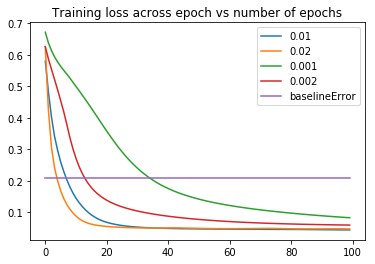

In [23]:
for learning_rate in [0.01,0.02,0.001,0.002]:
    num_epochs = 100
    e_losses=[]
    loss_across_epoch=[]
    model1 = Net_5(x_train.shape[1])
    optimizer = torch.optim.Adam(model1.parameters(),lr=learning_rate)
    for e in range(num_epochs):
        e_losses = train_epoch(model1,optimizer ,criteria,100)
        #loss_to_plot = sum(e_losses)/len(e_losses)
        loss_across_epoch.append(e_losses)
    
    print("Accuracy for the testing data with learning rate ",learning_rate)
    dummy=testingAccuracy(model1,x_test,output1)
    print("Accuracy for the training data")
    dummy=testingAccuracy(model1,x_train,train_numpy[:,-1].astype('float64'))
    plt.title('Training loss across epoch vs number of epochs')
    plt.plot(loss_across_epoch)
    #plt.axhline(y=baseline_error)
    
plt.plot(baseline_error_plot)
plt.legend(['0.01','0.02','0.001','0.002','baselineError'], loc='upper right')
plt.show()

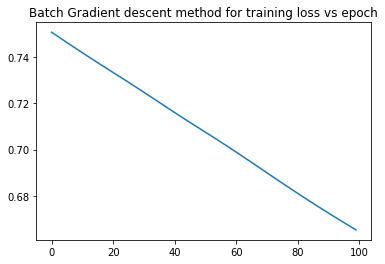

In [24]:
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

/work/test/venv/lib/python3.5/site-packages/torch/optim/lr_scheduler.py:82: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Accuracy is  78.76703917475132
Accuracy is  78.98892534864643
Accuracy is  96.00884195014122
Accuracy is  86.18744872846595
Accuracy is  95.45622006631463
Accuracy is  90.31993437243642
Accuracy is  97.94915878668795
Accuracy is  91.86833470057424
Accuracy is  98.74739039665971
Accuracy is  98.62592288761279


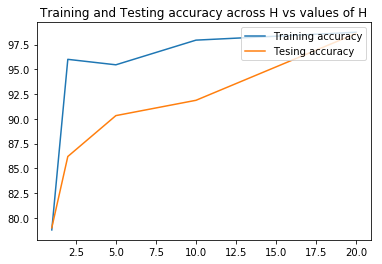

In [25]:
criteria= nn.BCELoss()
epochs=100
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    for e in range(epochs):
        scheduler.step()
        e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    training_accuracy_every_H.append(testingAccuracy(model,x_train,train_numpy[:,-1].astype('float64')))
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output1))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()

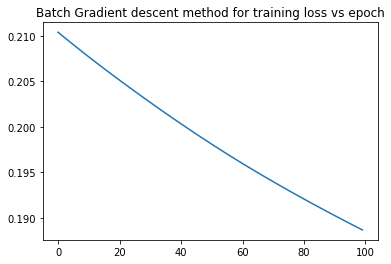

In [26]:
criteria= nn.MSELoss()
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
num_epochs = 100
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

In [27]:
for param in model.parameters ():
    print(param.data)

tensor([[-0.0084, -0.2257,  0.3413, -0.2023,  0.0196],
        [-0.1458, -0.4381, -0.2851,  0.2096, -0.2935],
        [-0.0131, -0.1712, -0.0462,  0.4116, -0.1939],
        [ 0.4617,  0.4894, -0.1965,  0.3023,  0.0869],
        [ 0.4012,  0.3047, -0.3573,  0.0654, -0.1283]])
tensor([ 0.5092,  0.0472, -0.1402,  0.3751, -0.4525])
tensor([[-0.4061,  0.2936,  0.1760, -0.4261, -0.2446]])
tensor([-0.2117])


In [28]:
baseline_accuracy = testingAccuracy(model,x_test,output1)
baseline_error= 1-(baseline_accuracy/100)
baseline_error_plot=[baseline_error]*100

Accuracy is  78.98892534864643


Accuracy for the testing data with learning rate  0.01
Accuracy is  99.11812961443806
Accuracy for the training data
Accuracy is  98.83335380081051
Accuracy for the testing data with learning rate  0.02
Accuracy is  98.99507793273175
Accuracy for the training data
Accuracy is  98.89475623234681
Accuracy for the testing data with learning rate  0.001
Accuracy is  98.56439704675964
Accuracy for the training data
Accuracy is  98.01056121822424
Accuracy for the testing data with learning rate  0.002
Accuracy is  99.21041837571781
Accuracy for the training data
Accuracy is  98.83335380081051


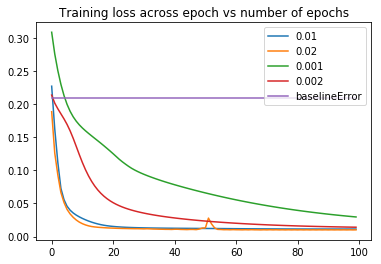

In [29]:
criteria= nn.MSELoss()
for learning_rate in [0.01,0.02,0.001,0.002]:
    num_epochs = 100
    e_losses=[]
    loss_across_epoch=[]
    model1 = Net_5(x_train.shape[1])
    optimizer = torch.optim.Adam(model1.parameters(),lr=learning_rate)
    for e in range(num_epochs):
        e_losses = train_epoch(model1,optimizer ,criteria,100)
        loss_across_epoch.append(e_losses)
    
    print("Accuracy for the testing data with learning rate ",learning_rate)
    dummy=testingAccuracy(model1,x_test,output1)
    print("Accuracy for the training data")
    dummy=testingAccuracy(model1,x_train,train_numpy[:,-1].astype('float64'))
    plt.title('Training loss across epoch vs number of epochs')
    plt.plot(loss_across_epoch)
    
plt.plot(baseline_error_plot)
plt.legend(['0.01','0.02','0.001','0.002','baselineError'], loc='upper right')
plt.show()

Accuracy is  78.76703917475132
Accuracy is  78.98892534864643
Accuracy is  95.67726881984527
Accuracy is  93.16037735849056
Accuracy is  96.426378484588
Accuracy is  87.69483182936834
Accuracy is  96.26673216259364
Accuracy is  86.33100902378999
Accuracy is  98.07196364976053
Accuracy is  93.92945036915505


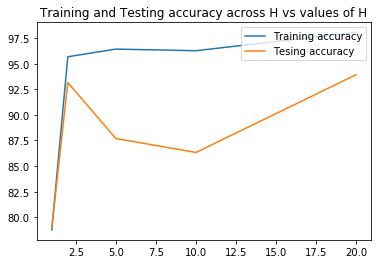

In [30]:
epochs=100
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
criteria= nn.MSELoss()
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    for e in range(epochs):
        scheduler.step()
        e_losses = train_epoch(model,optimizer,criteria,x_train.shape[0])
    training_accuracy_every_H.append(testingAccuracy(model,x_train,train_numpy[:,-1].astype('float64')))
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output1))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()

In [33]:
epochs=100
for H1 in [1,2,5,10,20]:
    for H2 in [15,120,220,230]:
        print(H1,' ',H2)
        criteria= nn.BCELoss()
        model11 = Net_2Layer(x_train.shape[1],H1,H2)
        optimizer = torch.optim.Adam(model11.parameters(),lr=0.01)
        for e in range(epochs):
            e_losses = train_epoch(model11,optimizer ,criteria,x_train.shape[0])
        print("Testing accuracy for the 2 layer for the model with H1 ",H1," and H2 ",H2)
        testingAccuracy(model11,x_test,output1)
        

1   15
Testing accuracy for the 2 layer for the model with H1  1  and H2  15
Accuracy is  88.65873666940115
1   120
Testing accuracy for the 2 layer for the model with H1  1  and H2  120
Accuracy is  78.98892534864643
1   220
Testing accuracy for the 2 layer for the model with H1  1  and H2  220
Accuracy is  99.3129614438064
1   230
Testing accuracy for the 2 layer for the model with H1  1  and H2  230
Accuracy is  78.98892534864643
2   15
Testing accuracy for the 2 layer for the model with H1  2  and H2  15
Accuracy is  93.72436423297785
2   120
Testing accuracy for the 2 layer for the model with H1  2  and H2  120
Accuracy is  86.55660377358491
2   220
Testing accuracy for the 2 layer for the model with H1  2  and H2  220
Accuracy is  89.65340442986054
2   230
Testing accuracy for the 2 layer for the model with H1  2  and H2  230
Accuracy is  97.75430680885972
5   15
Testing accuracy for the 2 layer for the model with H1  5  and H2  15
Accuracy is  87.6538146021329
5   120
Testing ac